In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from modelling.fit import fit_models
from modelling.pre_process import pre_processing
from functools import partial
from collections import OrderedDict

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time


from zipfile import ZipFile

import warnings
warnings.filterwarnings("ignore")



In [3]:
zip_file = ZipFile('Dados/cenario1.zip')
d = ['cenario1/amostra_'+str(i)+'.csv' for i in np.random.choice(range(100,1000), 6)]

dados = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
       for text_file in zip_file.infolist()
#        if text_file.filename.endswith('.csv')
        if text_file.filename in d
        }

In [4]:
d

['cenario1/amostra_972.csv',
 'cenario1/amostra_168.csv',
 'cenario1/amostra_636.csv',
 'cenario1/amostra_240.csv',
 'cenario1/amostra_888.csv',
 'cenario1/amostra_871.csv']

In [5]:
n_neighbors = 10
n_components = 2

methods = OrderedDict()

LLE = partial(
    manifold.LocallyLinearEmbedding,
    n_neighbors=n_neighbors,
    n_components=n_components,
    eigen_solver="auto",
)

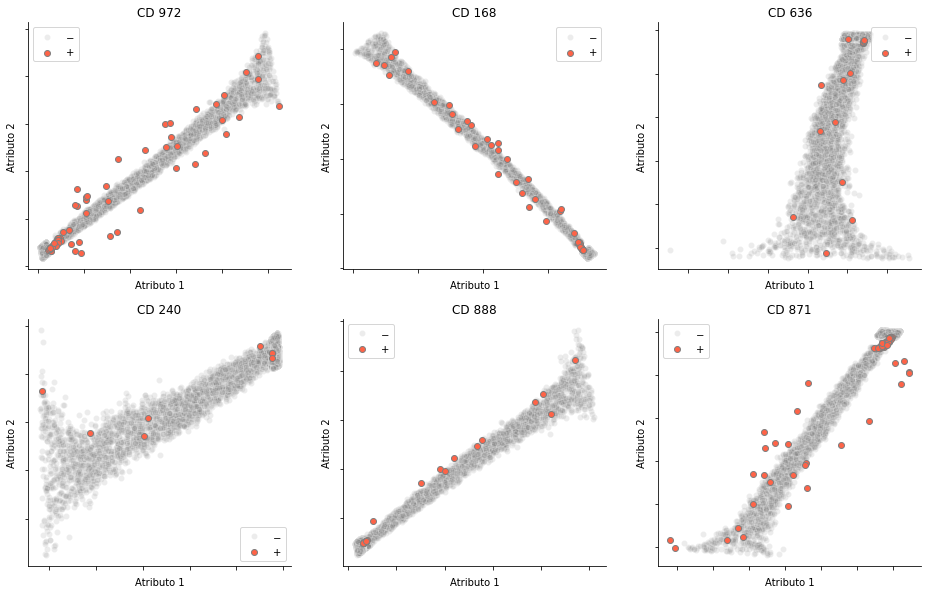

In [7]:
n_samples = 50
n_components = 2
t_size = .6
alpha = .15
alpha_f = 1
cor_nf= 'gray'
contorno_nf = 'w'
contorno_f = 'gray'
cor_f='tomato'

# metodo = LLE(method="modified")
# metodo = manifold.TSNE(n_components=n_components, init="pca", random_state=0)
metodo = manifold.MDS(n_components, max_iter=100, n_init=3, n_jobs=-1, random_state=123)
# metodo = LLE(method="ltsa")
fig, ax = plt.subplots(2,3, figsize=(16,10))
eixo = (ax[0,0], ax[0,1], ax[0,2],
        ax[1,0], ax[1,1], ax[1,2])

for i,j in zip(d, eixo):

    X, y, teste = pre_processing(dados[i])
    X, teste = train_test_split(teste, test_size=t_size, stratify=teste['isFraud'])
    nf = teste['isFraud'] == 0
    f = teste['isFraud'] == 1
    Y = metodo.fit_transform(teste)
    j.scatter(Y[nf, 0], Y[nf, 1], alpha=alpha,label=r'$-$', color=cor_nf,edgecolors=contorno_nf)
    j.scatter(Y[f, 0], Y[f, 1], label=r'$+$', color=cor_f, edgecolors=contorno_f, alpha=alpha_f)
    j.set_title(f'CD {i[-7:-4]}')
    j.xaxis.set_major_formatter(NullFormatter())
    j.yaxis.set_major_formatter(NullFormatter())
    j.axis("tight")
    j.legend()
    j.set_xlabel('Atributo 1')
    j.set_ylabel('Atributo 2')
    for side in ['right','top']:
            j.spines[side].set_visible(False)

plt.savefig('Reducao_dim.png',
    dpi = 150,
    bbox_inches='tight',
    pad_inches = 0)